In [1]:
#Word2vec

#100B words - google news dataset
#3 million words,each word has 300 features

In [2]:
!pip install gdown --upgrade
#place the google drive sharing link
file_share_link = "https://drive.google.com/file/d/17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1/view?usp=sharing"

#extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2:file_share_link.find("/v")]

print(file_id)
!gdown "$file_id" #Download the data from google drive


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1
Downloading...
From (uriginal): https://drive.google.com/uc?id=17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1
From (redirected): https://drive.google.com/uc?id=17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1&confirm=t&uuid=be0c3852-d2a2-4c83-8e1d-68177b50057e
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:30<00:00, 53.2MB/s]


In [3]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [4]:
#GENSIM Basic functional package

In [5]:
#gensim
import gensim

model_path = r"/content/GoogleNews-vectors-negative300.bin"

model = gensim.models.KeyedVectors.load_word2vec_format(model_path,binary=True)

In [6]:
from random import choice

# Assuming model is your KeyedVectors model
vocab = list(model.index_to_key)  # list of vocabulary

print(vocab[:5])

['</s>', 'in', 'for', 'that', 'is']


In [7]:
len(vocab)#3 million

3000000

In [8]:
for i  in range(10):
  print(choice(vocab))

Rotte
ExoPC
Salta_Argentina
Brownish
Metascore
DAAT
erythrocytes
Digivision
hematite_alteration
SolarSave_®


In [9]:
"""def check_vocab(vocab,check_words):
    print("%40s %s"%("Word","Present"))
    print("%40s %s"%("------","------"))

    for word in check_words:
      print("%40s %s"%(word,word in model.vocab))
      if not word.lower() == word:
        print("%40s %s"%(word,word.lower() in model.vocab))"""


'def check_vocab(vocab,check_words):\n    print("%40s %s"%("Word","Present"))\n    print("%40s %s"%("------","------"))\n\n    for word in check_words:\n      print("%40s %s"%(word,word in model.vocab))\n      if not word.lower() == word:\n        print("%40s %s"%(word,word.lower() in model.vocab))'

In [10]:
def check_vocab(vocab, words_to_check):
    print('{:<15} {:<15}'.format('Word', 'Present'))
    print('-' * 30)

    for word in words_to_check:
        present = 'Yes' if word in vocab else 'No'
        print('{:<15} {:<15}'.format(word, present))

# Assuming model is your KeyedVectors model
check_vocab(list(model.index_to_key), ['Narendra', 'trump', 'data', 'machine', 'nlp'])


Word            Present        
------------------------------
Narendra        Yes            
trump           Yes            
data            Yes            
machine         Yes            
nlp             No             


In [11]:
#range of values
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vector = model.word_vec("Narendra_Modi")
print(vector.shape)

(300,)


<ipython-input-11-a4e4cb304636>:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vector = model.word_vec("Narendra_Modi")


In [12]:
print(f"Magnitude of a vector is {np.linalg.norm(vector)}")


Magnitude of a vector is 4.041469573974609


<ipython-input-13-12a32323f8a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector,kde = False,rug = True)


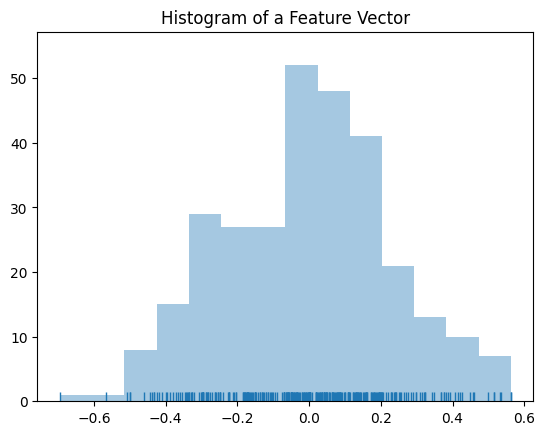

In [13]:
sns.distplot(vector,kde = False,rug = True)
plt.title("Histogram of a Feature Vector")
plt.show()

In [14]:
#Similarity
word1 = "bread"
word2 = "butter"
score = model.similarity(word1,word2)
print(f"Cosine similarity between {word1} &{word2}&{score}")

Cosine similarity between bread &butter&0.6417260766029358


In [15]:

word1 = "cycle"
word2 = "bicycle"
score = model.similarity(word1,word2)
print(f"Cosine similarity between {word1} &{word2}&{score}")

Cosine similarity between cycle &bicycle&0.16222114861011505


In [16]:

word1 = "cycle"
word2 = "jam"
score = model.similarity(word1,word2)
print(f"Cosine similarity between {word1} &{word2}&{score}")

Cosine similarity between cycle &jam&0.059445325285196304


Most similar words

In [17]:
word = "sofa"
results = model.most_similar(positive = word,topn = 10)
print(results)

[('couch', 0.8309177756309509), ('settee', 0.7764685750007629), ('sofas', 0.7543259859085083), ('loveseat', 0.7152645587921143), ('recliner', 0.7101271152496338), ('futon', 0.6624690890312195), ('leather_sofa', 0.6620596051216125), ('plush_sofa', 0.6556485295295715), ('ottoman', 0.6525835394859314), ('couches', 0.6501914262771606)]


Cosine Similarity

In [18]:
#cos(x,y) = x.y/mag(x).(mag(y))

In [19]:
matrix = model.vectors
print("shape of matrix is ",matrix.shape)

shape of matrix is  (3000000, 300)


In [20]:
w1 = model.key_to_index['bread']
w2 = model.key_to_index['butter']

v1 = matrix[w1, :]
v2 = matrix[w2, :]

print(f"Norm of the bread is {np.linalg.norm(v1)}")
print(f"Norm of the butter is {np.linalg.norm(v2)}")


Norm of the bread is 2.960254192352295
Norm of the butter is 3.1190855503082275


In [21]:
cos_sin = (np.dot(v1,v2))/(np.linalg.norm(v1)*np.linalg.norm(v2))
print(f'cosine similarity is {cos_sin}')

cosine similarity is 0.6417260766029358


#Skipgram Model -Hands on

In [22]:
!pip install gensim


In [23]:

!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.9 MB/s eta 0:00:00


In [24]:
#Reviews about the cell phones and accessories

!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

--2023-11-21 04:50:57--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  8.87MB/s    in 5.4s    

2023-11-21 04:51:02 (8.09 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [25]:
!gunzip reviews_Cell_Phones_and_Accessories_5.json.gz


In [26]:
import gensim
import pandas as pd

In [27]:
df = pd.read_json("/content/reviews_Cell_Phones_and_Accessories_5.json",lines=True)

In [28]:
df
df.shape

(194439, 9)

In [29]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194434,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,"[0, 0]",Works great just like my original one. I reall...,5,This works just perfect!,1405900800,"07 21, 2014"
194435,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,"[0, 0]",Great product. Great packaging. High quality a...,5,Great replacement cable. Apple certified,1405900800,"07 21, 2014"
194436,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,"[0, 0]","This is a great cable, just as good as the mor...",5,Real quality,1405900800,"07 21, 2014"
194437,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,"[0, 0]",I really like it becasue it works well with my...,5,I really like it becasue it works well with my...,1405814400,"07 20, 2014"


#Preprocessing and Tokenization


In [30]:
df["reviewText"][0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [31]:
gensim.utils.simple_preprocess("They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")#performs tokenization

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [32]:
review_text = df["reviewText"].apply(gensim.utils.simple_preprocess)
review_text.head()

0    [they, look, good, and, stick, good, just, don...
1    [these, stickers, work, like, the, review, say...
2    [these, are, awesome, and, make, my, phone, lo...
3    [item, arrived, in, great, time, and, was, in,...
4    [awesome, stays, on, and, looks, great, can, b...
Name: reviewText, dtype: object

# Train with Word2Vec Model

In [33]:
!pip install --upgrade gensim


In [34]:
from gensim.models import Word2Vec

model = Word2Vec(window=10, vector_size=100, min_count=2, sg=1)#epoch can be increased or decresed


Build the Vocabullary

In [35]:
model.build_vocab(review_text)

In [36]:
model.epochs

5

Train the Word2Vec Model

In [37]:
#model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)
model.train(review_text, total_examples=model.corpus_count, epochs=5)


(61508307, 83868975)

Save the model

In [38]:
model.save("./final_word2vec.model")

Find the similar Words and similarity between the words

In [39]:
#Word Embeddings
#Cosine similarity
model.wv.most_similar("bad")


[('terrible', 0.7432989478111267),
 ('horrible', 0.713103711605072),
 ('soso', 0.6769751906394958),
 ('okay', 0.6737349033355713),
 ('bleached', 0.6628276705741882),
 ('ok', 0.6589788198471069),
 ('good', 0.6557167768478394),
 ('liike', 0.6491946578025818),
 ('airbubble', 0.6465831398963928),
 ('extanded', 0.6463485360145569)]

In [40]:
model.wv.similarity(w1 = "cheap",w2 = "inexpensive")

0.66419756

In [41]:
matrix = model.wv.vectors # extract the word embedding matrix

print(f"shape of the word embedding matrx is{matrix.shape}")


#unique words = 35561

shape of the word embedding matrx is(35561, 100)


In [42]:
W_out = model.wv.vectors

W_out.shape #Output weights

(35561, 100)

In [43]:
# Get the keys (words) from the model's KeyedVectors
vocab_list = list(model.wv.key_to_index.keys())


In [44]:
len(vocab_list)

35561

In [45]:
vocab_list

['the',
 'it',
 'and',
 'to',
 'is',
 'this',
 'of',
 'for',
 'my',
 'that',
 'in',
 'on',
 'phone',
 'with',
 'you',
 'case',
 'but',
 'have',
 'not',
 'was',
 'as',
 'so',
 'one',
 'very',
 'are',
 'like',
 'if',
 'be',
 'can',
 'or',
 'great',
 'your',
 'at',
 'when',
 'use',
 'screen',
 'just',
 'good',
 'all',
 'they',
 'battery',
 'from',
 'would',
 'out',
 'will',
 'well',
 'an',
 'has',
 'iphone',
 'had',
 'get',
 'charge',
 'up',
 'no',
 'me',
 'than',
 'more',
 'only',
 'charger',
 'about',
 'product',
 'other',
 'there',
 'really',
 'time',
 'also',
 'off',
 'these',
 'which',
 'works',
 'does',
 'because',
 'do',
 'don',
 'them',
 'much',
 'back',
 'what',
 'nice',
 'little',
 'price',
 'love',
 'usb',
 'its',
 'some',
 'quality',
 'charging',
 'work',
 'fit',
 'any',
 'easy',
 'even',
 've',
 'device',
 'too',
 'after',
 'still',
 'used',
 'protector',
 'while',
 'power',
 'using',
 'got',
 'better',
 'am',
 'bought',
 'two',
 'now',
 'by',
 'cable',
 'first',
 'recommend'

In [46]:
vocab_len = len(model.wv.key_to_index)


In [47]:
'''# Old code using model.wv.vocab
# vocab = model.wv.vocab

# New code using model.wv.key_to_index and model.wv.index_to_key
key_to_index = model.wv.key_to_index
index_to_key = model.wv.index_to_key
# If you need the list of words in the vocabulary
vocab_list = list(key_to_index.keys())'''


'# Old code using model.wv.vocab\n# vocab = model.wv.vocab\n\n# New code using model.wv.key_to_index and model.wv.index_to_key\nkey_to_index = model.wv.key_to_index\nindex_to_key = model.wv.index_to_key\n# If you need the list of words in the vocabulary\nvocab_list = list(key_to_index.keys())'

In [48]:
if 'sum' in vocab:
    index_of_sum = vocab.index('sum')
    print(f"The index of 'sum' in the vocabulary is: {index_of_sum}")
else:
    print("'sum' is not in the vocabulary.")


The index of 'sum' in the vocabulary is: 7738


In [49]:
#Index to word
vocab_int2word = {c:w for c,w in enumerate(vocab_list)}


In [50]:
vocab_int2word

{0: 'the',
 1: 'it',
 2: 'and',
 3: 'to',
 4: 'is',
 5: 'this',
 6: 'of',
 7: 'for',
 8: 'my',
 9: 'that',
 10: 'in',
 11: 'on',
 12: 'phone',
 13: 'with',
 14: 'you',
 15: 'case',
 16: 'but',
 17: 'have',
 18: 'not',
 19: 'was',
 20: 'as',
 21: 'so',
 22: 'one',
 23: 'very',
 24: 'are',
 25: 'like',
 26: 'if',
 27: 'be',
 28: 'can',
 29: 'or',
 30: 'great',
 31: 'your',
 32: 'at',
 33: 'when',
 34: 'use',
 35: 'screen',
 36: 'just',
 37: 'good',
 38: 'all',
 39: 'they',
 40: 'battery',
 41: 'from',
 42: 'would',
 43: 'out',
 44: 'will',
 45: 'well',
 46: 'an',
 47: 'has',
 48: 'iphone',
 49: 'had',
 50: 'get',
 51: 'charge',
 52: 'up',
 53: 'no',
 54: 'me',
 55: 'than',
 56: 'more',
 57: 'only',
 58: 'charger',
 59: 'about',
 60: 'product',
 61: 'other',
 62: 'there',
 63: 'really',
 64: 'time',
 65: 'also',
 66: 'off',
 67: 'these',
 68: 'which',
 69: 'works',
 70: 'does',
 71: 'because',
 72: 'do',
 73: 'don',
 74: 'them',
 75: 'much',
 76: 'back',
 77: 'what',
 78: 'nice',
 79: 'li

In [51]:
# Index to word mapping
vocab_int2word = {index: word for word, index in model.wv.key_to_index.items()}

# Print the mapping
print(vocab_int2word)

{0: 'the', 1: 'it', 2: 'and', 3: 'to', 4: 'is', 5: 'this', 6: 'of', 7: 'for', 8: 'my', 9: 'that', 10: 'in', 11: 'on', 12: 'phone', 13: 'with', 14: 'you', 15: 'case', 16: 'but', 17: 'have', 18: 'not', 19: 'was', 20: 'as', 21: 'so', 22: 'one', 23: 'very', 24: 'are', 25: 'like', 26: 'if', 27: 'be', 28: 'can', 29: 'or', 30: 'great', 31: 'your', 32: 'at', 33: 'when', 34: 'use', 35: 'screen', 36: 'just', 37: 'good', 38: 'all', 39: 'they', 40: 'battery', 41: 'from', 42: 'would', 43: 'out', 44: 'will', 45: 'well', 46: 'an', 47: 'has', 48: 'iphone', 49: 'had', 50: 'get', 51: 'charge', 52: 'up', 53: 'no', 54: 'me', 55: 'than', 56: 'more', 57: 'only', 58: 'charger', 59: 'about', 60: 'product', 61: 'other', 62: 'there', 63: 'really', 64: 'time', 65: 'also', 66: 'off', 67: 'these', 68: 'which', 69: 'works', 70: 'does', 71: 'because', 72: 'do', 73: 'don', 74: 'them', 75: 'much', 76: 'back', 77: 'what', 78: 'nice', 79: 'little', 80: 'price', 81: 'love', 82: 'usb', 83: 'its', 84: 'some', 85: 'quality'

In [52]:
vocab_int2word[4697]

'nit'

In [53]:
#import numpy as np
#one_hot = np.zeros(shape=(1,vocab_len))
#one_hot[0,vocab['good'].index] = 1


In [54]:
import numpy as np

# Assuming you've already obtained the vocabulary indices
vocab_indices = [model.wv.key_to_index[word] for word in vocab_list]

# Initialize a one-hot encoding array
one_hot = np.zeros(shape=(1, vocab_len))

# Set the value to 1 for the index corresponding to the word 'good'
one_hot[0, vocab_indices[vocab_list.index('good')]] = 1

# Print the one-hot encoding
print(one_hot)


[[0. 0. 0. ... 0. 0. 0.]]


In [55]:
z_proj = np.dot(one_hot,matrix)
z_proj.shape#shape of the word to vector representation of the good

(1, 100)

In [56]:
#Take the multiplication of the word embedding and wout

In [57]:
a_proj = z_proj

z_out = np.dot(a_proj,W_out.T)

z_out.shape

(1, 35561)

In [58]:
##OUTPUT Layer
##Softmax

a_out = np.exp(z_out)/np.sum(np.exp(z_out))

In [59]:
a_out.shape

(1, 35561)

In [60]:
a_out = a_out.flatten()

indices = np.argsort(a_out)#sort in ascending order
indices = indices[::-1] #sort in descending order

for i  in range(10):
    word_index = indices[i]
    word = vocab_int2word[word_index]
    a_out_i = a_out[word_index]

    print(f"{word} with score {a_out_i}")


goode with score 0.0015167789527110753
goodry with score 0.001449126614138722
good with score 0.00046963116284169437
decent with score 0.0004358054688317162
excellent with score 0.0002560245545044042
reasonable with score 0.0002553004186726212
exceptional with score 0.00025348729403572713
booming with score 0.0002468598696946282
great with score 0.00024597867973156346
excelent with score 0.0002309144126527494


In [61]:
#Until now we have used a skipgram model and found the context words surrounding the skipgram model

#CBOW

In [62]:
#Processed input and output model is sent to logistic regression to find the highest score so these two words are neighbouring words or not
#In logistic regression can make the model overfitting so to avoid the overfitting we are using negative sampling

#1)Embedding  matrix = (10000,300)(vocabulary,Embedding size)
#2)Context matrix (10000,300)(Vocabulary,embedding size)

#one positive and associated negative samples




